# TASK # 03:
#### Determine the performance metrics and generate a plot for polynomial regression by selecting one predictor at a time from the given dataset. Set different values of degree of polynomial to observe the variations.
# TASK # 04:
#### For a dataset of your choice, repeat the same process for polynomial regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('/content/delivery.csv')

In [3]:
dataset.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
dataset.dropna(axis=0, inplace=True)

In [5]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [6]:
X.shape

(883, 8)

In [7]:
Y.shape

(883,)

In [8]:
X.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0
4,412,19.03,Clear,Low,Morning,Bike,16,5.0


In [9]:
Y.head()

,Delivery_Time_min
0,43
1,84
2,59
3,37
4,68


In [10]:
categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

In [11]:
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_columns)
], remainder='passthrough')
X=np.array(column_transformer.fit_transform(X))

# When Degree = 2

In [12]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit(X)
X_poly=poly.transform(X)

In [13]:
X_poly.shape

(883, 210)

In [14]:
X.shape

(883, 19)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=101)

In [16]:
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred=polymodel.predict(X_test)

In [18]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
174,24,24.784771,-0.784771
925,28,28.630970,-0.630970
762,55,57.640897,-2.640897
618,75,76.033171,-1.033171
79,46,45.924056,0.075944


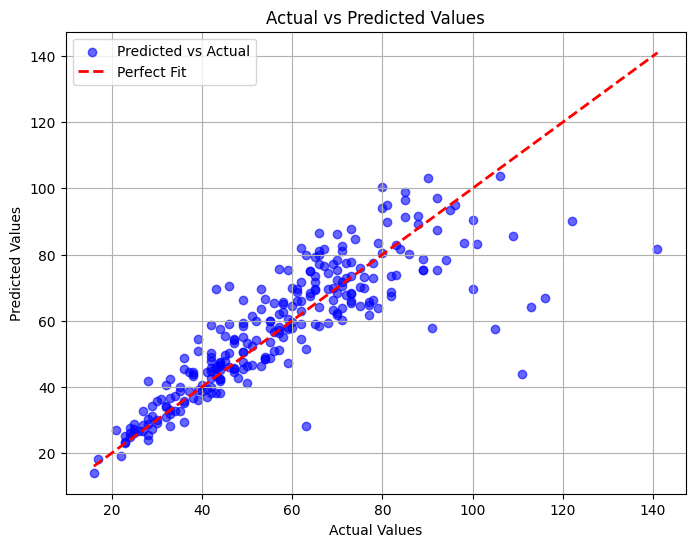

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()


In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7.573976616291145
MSE: 137.85494343784993
RMSE: 11.741164483893833


# When Degree = 3


In [21]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit(X)
X_poly=poly.transform(X)

In [22]:
X_poly.shape

(883, 1540)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=101)

In [24]:
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred=polymodel.predict(X_test)

In [26]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
174,24,11.285949,12.714051
925,28,64.933914,-36.933914
762,55,51.922503,3.077497
618,75,82.875000,-7.875000
79,46,50.096454,-4.096454


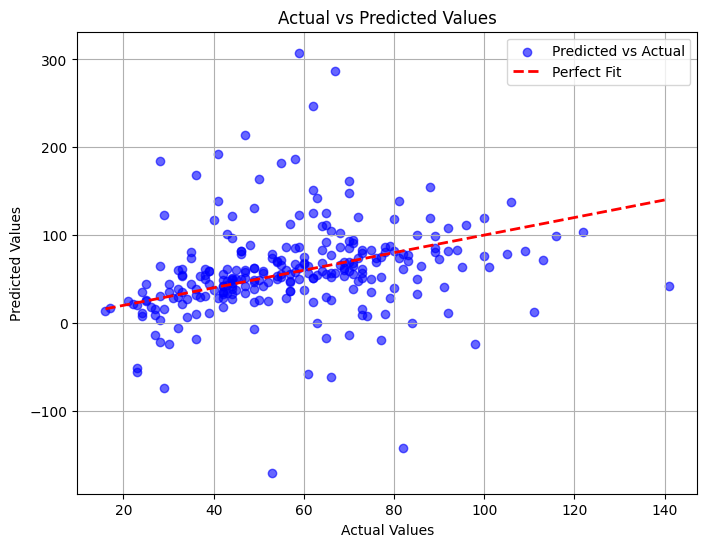

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()


In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 31.67534353755028
MSE: 2706.7766362882385
RMSE: 52.0266915754619


# When Degree = 4

In [29]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit(X)
X_poly=poly.transform(X)

In [30]:
X_poly.shape

(883, 8855)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=101)

In [32]:
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred=polymodel.predict(X_test)

In [34]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
174,24,28.243409,-4.243409
925,28,-18.448283,46.448283
762,55,44.029696,10.970304
618,75,151.813953,-76.813953
79,46,84.953419,-38.953419


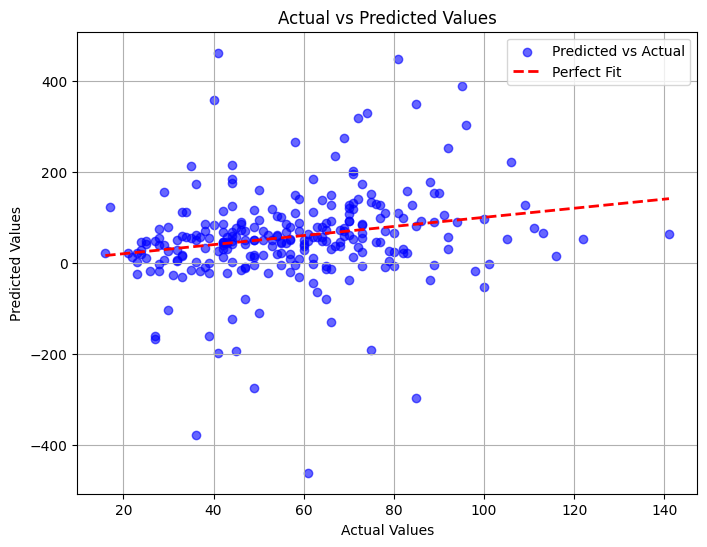

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()


In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 63.62200145829713
MSE: 10306.32658033114
RMSE: 101.52007969033092
